In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv") 

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
def missing_values(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = dataset.isnull().sum()/dataset.isnull().count()*100
    percent = (round(percent, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
    print(missing_data.head(5))
    
print("Train dataset")
print("---------------------")
missing_values(train_df)
print("\nTest dataset")
print("---------------------")
missing_values(test_df)
# should drop the location field

Train dataset
---------------------
          Total     %
location   2533  33.3
keyword      61   0.8
target        0   0.0
text          0   0.0
id            0   0.0

Test dataset
---------------------
          Total     %
location   1105  33.9
keyword      26   0.8
text          0   0.0
id            0   0.0


In [6]:
train_df = train_df.drop(['location'], axis=1)
test_df = test_df.drop(['location'], axis=1)

                  Keywords  Counts
0               fatalities      45
1               armageddon      42
2                   deluge      42
3                  sinking      41
4                   damage      41
..                     ...     ...
216          forest%20fire      19
217              epicentre      12
218                 threat      11
219             inundation      10
220  radiation%20emergency       9

[221 rows x 2 columns]


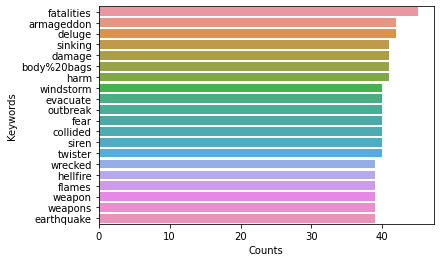

In [7]:
# have a look at the keyword occurences
keywords = train_df['keyword'].value_counts().index.tolist()
counts = train_df['keyword'].value_counts().tolist()
data = {'Keywords': keywords,
        'Counts': counts}
keyword_df = pd.DataFrame(data, columns=['Keywords', 'Counts'])
print(keyword_df)
ax = sns.barplot(x="Counts", y="Keywords", data=keyword_df.head(20))

In [8]:
# count text length and word length
train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
train_df['word_count'] = train_df['text'].str.split().apply(lambda x: len(x))
train_df.head()

,id,keyword,text,target,text_length,word_count
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [9]:
test_df['text_length'] = train_df['text'].apply(lambda x: len(x))
test_df['word_count'] = train_df['text'].str.split().apply(lambda x: len(x))
test_df.head()

,id,keyword,text,text_length,word_count
0,0,NaN,Just happened a terrible car crash,69,13
1,2,NaN,"Heard about #earthquake is different cities, s...",38,7
2,3,NaN,"there is a forest fire at spot pond, geese are...",133,22
3,9,NaN,Apocalypse lighting. #Spokane #wildfires,65,8
4,11,NaN,Typhoon Soudelor kills 28 in China and Taiwan,88,16


In [10]:
train_df.text_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

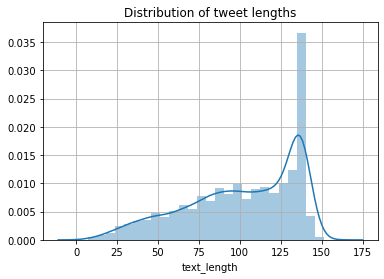

In [11]:
ax = sns.distplot(train_df['text_length'])
ax.set_title('Distribution of tweet lengths')
ax.grid(True)

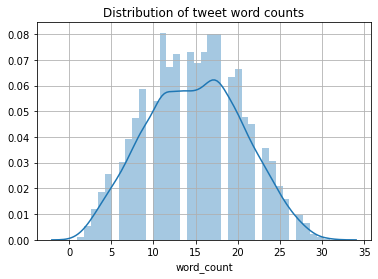

In [12]:
ax = sns.distplot(train_df['word_count'])
ax.set_title('Distribution of tweet word counts')
ax.grid(True)

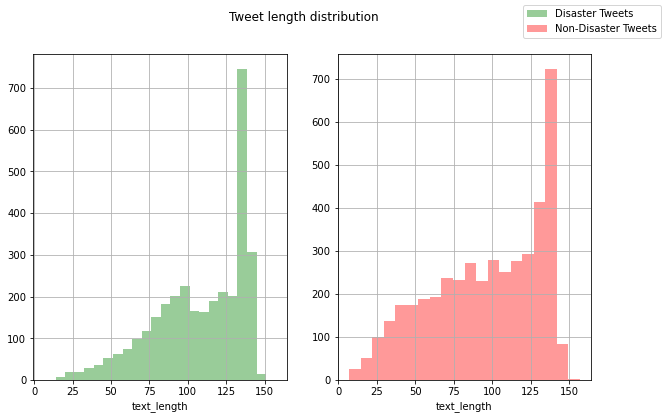

In [13]:
# visualise the distribution of text length in comparison to target feature
# "do disaster tweets have longer text length than non-disaster tweets or vice versa?"
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 6))
sns.distplot(train_df[train_df['target']==1]['text_length'], ax=ax1, kde=False, color='green', label='Disaster Tweets')
sns.distplot(train_df[train_df['target']==0]['text_length'], ax=ax2, kde=False, color='red', label='Non-Disaster Tweets')
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()
# both have similar distribution

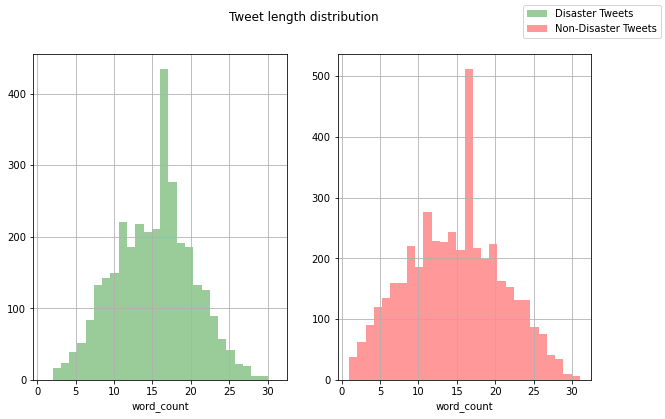

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 6))
sns.distplot(train_df[train_df['target']==1]['word_count'], ax=ax1, kde=False, color='green', label='Disaster Tweets')
sns.distplot(train_df[train_df['target']==0]['word_count'], ax=ax2, kde=False, color='red', label='Non-Disaster Tweets')
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

In [15]:
# Examples of disaster tweets
train_df[train_df['target']==1]['text'].head(11)

0     Our Deeds are the Reason of this #earthquake M...
1                Forest fire near La Ronge Sask. Canada
2     All residents asked to 'shelter in place' are ...
3     13,000 people receive #wildfires evacuation or...
4     Just got sent this photo from Ruby #Alaska as ...
5     #RockyFire Update => California Hwy. 20 closed...
6     #flood #disaster Heavy rain causes flash flood...
7     I'm on top of the hill and I can see a fire in...
8     There's an emergency evacuation happening now ...
9     I'm afraid that the tornado is coming to our a...
10          Three people died from the heat wave so far
Name: text, dtype: object

In [16]:
# Examples of non-disaster tweets
train_df[train_df['target']==0]['text'].head(11)

15                    What's up man?
16                     I love fruits
17                  Summer is lovely
18                 My car is so fast
19      What a goooooooaaaaaal!!!!!!
20            this is ridiculous....
21                 London is cool ;)
22                       Love skiing
23             What a wonderful day!
24                          LOOOOOOL
25    No way...I can't eat that shit
Name: text, dtype: object

In [17]:
# Data preprocessing
# 1. Data cleaning - remove urls, emojis, html content, punctuations
# 2. Make text all lower or uppercase - algorithms do no treat the same word different in different cases
# 3. Remove noise - everything in the text that is not a standard number or letter (punctuation, numerical values)
# 4. Tokenization - the process of converting text strings into a list of tokens (words)
# 5. Stopword removal - some extremely common words that have little value to matching a user need
# 6. Stemming - the process of reducing derived words to their stem, base or root form 
# eg. "stems", "stemming", "stemmed" = "stem"
# 7. Lemmatization - stemming can often create non-existent words, lemmas are actual words
# the root stem is not something you can look up in a dictionary, but can look up a lemma
# eg. "run" is a base form for "running" and "ran", "better" and "good" are in the same lemma

In [18]:
import nltk # natural language toolkit
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [19]:
# create a function to clean the text
import string 
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def clean_text(text):
    text = text.lower() # convert all characters to lower case
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = re.sub('http[s]?://\S+', '', text) # remove urls
    text = re.sub(r'\w*\d\w*', '', text).strip() # remove words containing numbers
    text = re.sub('\n', '', text) # remove new line
    text = text.replace("#", "").replace("_", " ").replace("@", " ")
    text = remove_emoji(text) # remove emojis
    return text
    

In [20]:
# apply the clean_text function to both test and training datasets copies
train_df1=train_df.copy()
test_df1=test_df.copy()
train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))

In [21]:
# compare the texts before and after cleaning
def before_after_text_preprocess(before_text, after_text):
    print('Text before cleanup')
    print('-'*60)
    print(before_text.head(5))
    print('\nText after cleanup')
    print('-'*60)
    print(after_text.head(5))

In [22]:
before_after_text_preprocess(train_df['text'], train_df1['text'])

Text before cleanup
------------------------------------------------------------
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

Text after cleanup
------------------------------------------------------------
0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object


In [23]:
# tokenization - test the output of a few tokenizers
text = "Heard about #earthquake is different cities, stay safe everyone."
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')
print("-"*75)
print("Example Text: ",text)
print("-"*75)
print("Tokenization by whitespace:- ",tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer:- ",tokenizer2.tokenize(text))
print("Tokenization by punctuation:- ",tokenizer3.tokenize(text))
print("Tokenization by regular expression:- ",tokenizer4.tokenize(text))

---------------------------------------------------------------------------
Example Text:  Heard about #earthquake is different cities, stay safe everyone.
---------------------------------------------------------------------------
Tokenization by whitespace:-  ['Heard', 'about', '#earthquake', 'is', 'different', 'cities,', 'stay', 'safe', 'everyone.']
Tokenization by words using Treebank Word Tokenizer:-  ['Heard', 'about', '#', 'earthquake', 'is', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Tokenization by punctuation:-  ['Heard', 'about', '#', 'earthquake', 'is', 'different', 'cities', ',', 'stay', 'safe', 'everyone', '.']
Tokenization by regular expression:-  ['Heard', 'about', 'earthquake', 'is', 'different', 'cities', 'stay', 'safe', 'everyone']


In [24]:
# tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

In [25]:
before_after_text_preprocess(train_df['text'], train_df1['text'])

Text before cleanup
------------------------------------------------------------
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

Text after cleanup
------------------------------------------------------------
0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object


In [26]:
# remove stopwords
# nltk.download('stopwords')
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [27]:
train_df2=train_df1.copy()
test_df2=test_df1.copy()
train_df2['text'] = train_df1['text'].apply(lambda x: remove_stopwords(x))
test_df2['text'] = test_df1['text'].apply(lambda x: remove_stopwords(x))

In [28]:
before_after_text_preprocess(train_df1['text'], train_df2['text'])

Text before cleanup
------------------------------------------------------------
0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

Text after cleanup
------------------------------------------------------------
0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object


In [29]:
# stemming and lemmatization
# nltk.download('wordnet')
text =  "ran deduced dogs talking studies"

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)

# stemmer
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# lemmatizer
lemmatizer=nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

Stemming the sentence:  ran deduc dog talk studi
Lemmatizing the sentence:  ran deduced dog talking study


In [30]:
# combine text after processing it
def combine_text(text):
    all_text = ' '.join(text)
    return all_text

In [31]:
train_df2['text'] = train_df2['text'].apply(lambda x : combine_text(x))
test_df2['text'] = test_df2['text'].apply(lambda x : combine_text(x))

In [32]:
train_df2.head()

,id,keyword,text,target,text_length,word_count
0,1,NaN,deeds reason earthquake may allah forgive us,1,69,13
1,4,NaN,forest fire near la ronge sask canada,1,38,7
2,5,NaN,residents asked shelter place notified officer...,1,133,22
3,6,NaN,people receive wildfires evacuation orders cal...,1,65,8
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88,16


In [33]:
# create a function to preprocess the text
def preprocess_text(text):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    cleaned_txt = clean_text(text)
    tokenized_text = tokenizer.tokenize(cleaned_txt)
    removed_stopwords = remove_stopwords(tokenized_text)
    combined_text = combine_text(removed_stopwords)
    return combined_text

In [34]:
train_df3=train_df.copy()
train_df3['text'] = train_df3['text'].apply(lambda x : preprocess_text(x))
train_df3.head()

,id,keyword,text,target,text_length,word_count
0,1,NaN,deeds reason earthquake may allah forgive us,1,69,13
1,4,NaN,forest fire near la ronge sask canada,1,38,7
2,5,NaN,residents asked shelter place notified officer...,1,133,22
3,6,NaN,people receive wildfires evacuation orders cal...,1,65,8
4,7,NaN,got sent photo ruby alaska smoke wildfires pou...,1,88,16


In [36]:
test_df3=test_df.copy()
test_df3['text'] = test_df3['text'].apply(lambda x : preprocess_text(x))
test_df3.head()

,id,keyword,text,text_length,word_count
0,0,NaN,happened terrible car crash,69,13
1,2,NaN,heard earthquake different cities stay safe ev...,38,7
2,3,NaN,forest fire spot pond geese fleeing across str...,133,22
3,9,NaN,apocalypse lighting spokane wildfires,65,8
4,11,NaN,typhoon soudelor kills china taiwan,88,16


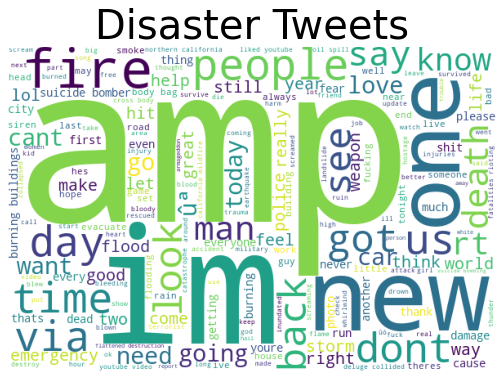

In [37]:
# have a quick look of the tweets in wordcloud
# !pip install wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(train_df3.text))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Disaster Tweets',fontsize=40);

In [38]:
# text vectorization
# 1. bag of words - describes the occurrence of words within a doc
# any info about the order of structure of words in the doc is discarded
# 2. term frequency-inverse document frequency (TFIDF) features 
# problem with bag of words - highly frequent words will dominate in the doc 
# larger score but not as much informational content
# rescale the frequency of words by how often they appear in all docs
# so that frequent words like "the" are penalized 
# term frequency (TF) - a scoring of the frequency of the word in the current doc
# = no. of time term t appears in a doc/no. of terms in the doc
# inverse document frequency (IDF) - a scoring of how rare the word is across docs
# = 1+log(N/n) - N = no. of docs, n = no. of docs a term t appeared

In [49]:
# vectorize the text using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer()
train_cv = count_vectorizer.fit_transform(train_df3['text'])
test_cv = count_vectorizer.transform(test_df3["text"])

# Keeping only non-zero elements to preserve space - convert into dense matrix
# sparse matrix = most elements are zeros
print(train_cv[0].todense())

[[0 0 0 ... 0 0 0]]


In [50]:
# vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tf = tfidf.fit_transform(train_df3['text'])
test_tf = tfidf.transform(test_df3["text"])

In [52]:
#Split the CountVector vectorized data into train and test datasets for model training and testing
from sklearn.model_selection import train_test_split

X_train_cv, X_test_cv, y_train_cv, y_test_cv =train_test_split(train_cv,train_df.target,test_size=0.2,random_state=2020)

In [61]:
#Define a function to fit and predict on training and test data sets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def fit_and_predict(model,X_train,y_train,X_test,y_test):
    
    '''Input- model=model to be trained
              X_train, y_train= traing data set
              X_test,  y_test = testing data set
       Output- Print accuracy of model for training and test data sets   
    '''
    
    # Fitting a simple Logistic Regression on Counts
    clf = model
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    confusion_matrix(y_test,predictions)
    print('\n')
    print(classification_report(y_test,predictions))
    print('-'*50)
    print("{}" .format(model))
    print('-'*50)
    print('Accuracy of classifier on training set:{}%'.format(round(clf.score(X_train, y_train)*100)))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(round(accuracy_score(y_test,predictions)*100)))
    print('-'*50)

In [62]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a list of the regression models to be used
models=[LogisticRegression(C=1.0),SVC(),MultinomialNB(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=5),RandomForestClassifier()]

In [63]:
# Loop through the list of models and use 'fit_and_predict()' function to trian and make predictions
for model in models:
    fit_and_predict(model,X_train_cv, y_train_cv,X_test_cv,y_test_cv)



              precision    recall  f1-score   support

           0       0.79      0.89      0.84       849
           1       0.84      0.70      0.76       674

    accuracy                           0.81      1523
   macro avg       0.81      0.80      0.80      1523
weighted avg       0.81      0.81      0.80      1523

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:96%
--------------------------------------------------
Accuracy of classifier on test set:81%
--------------------------------------------------


              precision    recall  f1-score   support

           0       0.77      0.93      0.84       849
           1       0.88      0.65      0.74       674

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.82      0.80      0.80      1523

-----------------------------------

In [64]:
# Split the TFDIF vectorized data into train and test datasets for model training and testing
X_train_tf, X_test_tf, y_train_tf, y_test_tf =train_test_split(train_tf,train_df.target,test_size=0.2,random_state=2020)

In [65]:
# Loop through the list of models and use 'fit_and_predict()' function to train and make predictions on the TFDIF vectororized data
for model in models:
    fit_and_predict(model,X_train_tf, y_train_tf,X_test_tf,y_test_tf)



              precision    recall  f1-score   support

           0       0.78      0.91      0.84       849
           1       0.86      0.67      0.75       674

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.80      1523
weighted avg       0.81      0.80      0.80      1523

--------------------------------------------------
LogisticRegression()
--------------------------------------------------
Accuracy of classifier on training set:88%
--------------------------------------------------
Accuracy of classifier on test set:80%
--------------------------------------------------


              precision    recall  f1-score   support

           0       0.77      0.92      0.84       849
           1       0.87      0.65      0.74       674

    accuracy                           0.80      1523
   macro avg       0.82      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523

-----------------------------------

In [74]:
# Printing model performance results
results_dict_cv = {'Classifier':['Logistic regression', 'SVC', 'MultinomialNB', 
                              'DecisionTreeClassifier', 'KNeighborsClassifier',
                              'RandomForestClassifier'],
                'F1-Score':[0.80, 0.80, 0.80, 0.76, 0.66, 0.79],
                'Accuracy':['81%', '80%', '80%','76%','69%','79%']} 
results_cv = pd.DataFrame(results_dict_cv)
print("Count Vectorization")
print("---------------------")
print(results_cv)

Count Vectorization
---------------------
               Classifier  F1-Score Accuracy
0     Logistic regression      0.80      81%
1                     SVC      0.80      80%
2           MultinomialNB      0.80      80%
3  DecisionTreeClassifier      0.76      76%
4    KNeighborsClassifier      0.66      69%
5  RandomForestClassifier      0.79      79%


In [75]:
# Printing model performance results
results_dict_tf = {'Classifier':['Logistic regression', 'SVC', 'MultinomialNB', 
                              'DecisionTreeClassifier', 'KNeighborsClassifier',
                              'RandomForestClassifier'],
                'F1-Score':[0.80, 0.80, 0.79, 0.74, 0.60, 0.79],
                'Accuracy':['80%', '80%', '80%','74%','66%','79%']} 
results_tf = pd.DataFrame(results_dict_tf)
print("TFIDF")
print("---------------------")
print(results_tf)

TFIDF
---------------------
               Classifier  F1-Score Accuracy
0     Logistic regression      0.80      80%
1                     SVC      0.80      80%
2           MultinomialNB      0.79      80%
3  DecisionTreeClassifier      0.74      74%
4    KNeighborsClassifier      0.60      66%
5  RandomForestClassifier      0.79      79%


In [77]:
# cv logistic regression performed the best
# look at the available parameters
from pprint import pprint
clf_logreg = LogisticRegression(C=1.0)
pprint(clf_logreg.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [84]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# the norm used in the penalization for regularization
penalty = ['l1', 'l2', 'elasticnet']
# inverse of regularization strength - smaller values = stronger regularization
C = [0.25, 0.5, 0.75, 1.0]
# algorithm to use in the optimization problem
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# Maximum number of iterations taken for the solvers to converge
max_iter = [50, 100, 200, 500]
multi_class = ['auto', 'ovr', 'multinomial']

# Create the random grid
random_grid = {'penalty': penalty,
               'C': C,
               'solver': solver,
               'max_iter': max_iter,
               'multi_class': multi_class}
pprint(random_grid)

{'C': [0.25, 0.5, 0.75, 1.0],
 'max_iter': [50, 100, 200, 500],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [85]:
clf_logreg_random = RandomizedSearchCV(estimator=clf_logreg, 
                               param_distributions=random_grid, 
                               n_iter=100, 
                               cv=10, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
clf_logreg_random.fit(X_train_cv, y_train_cv)
clf_logreg_random.best_params_ # show the best parameters

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 959 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 977 out of 1000 | elapsed:    7.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    7.9s finished


{'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 100,
 'C': 0.25}

In [86]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
               'C': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35],
               'max_iter': [50, 75, 100, 125, 150]
             }
clf_logreg = LogisticRegression(C=1.0, 
                                random_state=1, 
                                n_jobs=-1)
clf_logreg = GridSearchCV(estimator=clf_logreg,
                          param_grid=param_grid, 
                          cv=10, 
                          verbose=2, 
                          n_jobs=-1)
clf_logreg.fit(X_train_cv, y_train_cv)
clf_logreg.best_params_ # show the best parameters

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.0s finished


{'C': 0.25, 'max_iter': 50}

In [88]:
logreg = LogisticRegression(C=0.25, max_iter=50, random_state=1, n_jobs=-1)
logreg.fit(X_train_cv, y_train_cv)
y_prediction = logreg.predict(X_test_cv)
logreg.score(X_train_cv, y_train_cv)

0.910016420361248

[[3153  340]
 [ 956 1641]]


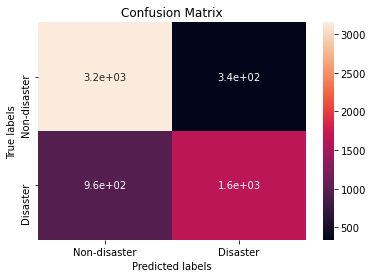

In [93]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(logreg, X_train_cv, y_train_cv, cv=3)
cm = confusion_matrix(y_train_cv, predictions)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-disaster', 'Disaster']); ax.yaxis.set_ticklabels(['Non-disaster', 'Disaster']);

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_train_cv, predictions))
print("Recall:",recall_score(y_train_cv, predictions))
print("F1 score:",f1_score(y_train_cv, predictions))

Precision: 0.828369510348309
Recall: 0.6318829418559877
F1 score: 0.7169069462647444


In [102]:
test_df_final=test_df.copy()
test_df_final['text'] = test_df_final['text'].apply(lambda x : preprocess_text(x))
test_vector = count_vectorizer.transform(test_df_final["text"])

In [104]:
sub_df = pd.read_csv('sample_submission.csv')
sub_df["target"] = logreg.predict(test_vector)
sub_df.to_csv("submission.csv", index=False)